In [1]:
# Importando as bibliotecas necessárias para acesso ao SGBDR MYSQL e ao trabalho com DataFrame
import pandas as pd
import pymysql

## NORMALIZAR O NOME DO ARQUIVO E O NOME DOS CAMPOS NO DATAFRAME

In [2]:
# Criando DataFrame com dados de planilha do excel
df = pd .read_excel('./dataset/mortes_por_covid.xlsx')
df.head(3)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Listando colunas existentes no DataFrame df
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [4]:
# Normalizando os nomes das colunas do DataFrame usando o método replace() e lower()
# Para isso usaremos list comphreension
df.columns = [x.lower().replace(" ","_").replace("?","") \
                    .replace("-","_").replace(r"/","_").replace("\\","_").replace(r"%","") \
                    .replace(")","").replace(r"(","").replace("?","").replace("$","") for x in df.columns]

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [5]:
# Exibindo os dois primeiro registros do DataFrame df
df.head(2)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Exibindo o tipo de dados dos campos do DataFrame df
df.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
population                                   float64
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 f

In [7]:
# Lista o total de registros do DataFrame df
len(df.columns)

26

In [8]:
# Variável - substituicoes, mapeia o tipo de dados do DataFrame df para o tipo de dados do SGBDR MYSQL
substituicoes = {
    'object': 'varchar',
    'float64': 'float',
    'int64': 'int',
    'datetime64': 'timestamp',
    'timedelta64[ns]': 'varchar'    
}

substituicoes

{'object': 'varchar',
 'float64': 'float',
 'int64': 'int',
 'datetime64': 'timestamp',
 'timedelta64[ns]': 'varchar'}

In [9]:
# Mapeando data type df para data type Mysql
col_string = ", ".join("{} {}".format(n, d) for (n, d) in zip(df.columns, df.dtypes.replace(substituicoes)))
col_string

'iso_code varchar, continent varchar, location varchar, date datetime64[ns], population float, total_cases float, new_cases float, new_cases_smoothed float, total_deaths float, new_deaths float, new_deaths_smoothed float, total_cases_per_million float, new_cases_per_million float, new_cases_smoothed_per_million float, total_deaths_per_million float, new_deaths_per_million float, new_deaths_smoothed_per_million float, reproduction_rate float, icu_patients float, icu_patients_per_million float, hosp_patients float, hosp_patients_per_million float, weekly_icu_admissions float, weekly_icu_admissions_per_million float, weekly_hosp_admissions float, weekly_hosp_admissions_per_million float'

## CONECTAR AO SGBDR MYSQL
### CRIAR O BANCO DE DADOS PORTIFOLIO E TABELAS ASSOCIADAS

In [10]:
# fazer conexão com o banco de dados mysql -- ,db='sales'

conn=pymysql.connect(host='127.0.0.1',port=int(3306),user='conectado',passwd='Wikazako!-1975')

cursor = conn.cursor()
print("Conexão ao banco de dados estabelecida com sucesso, novamente!!!")

Conexão ao banco de dados estabelecida com sucesso, novamente!!!


In [11]:
# Exibindo a relação de banco de dados existentes no mysql
cursor.execute("SHOW DATABASES;")
resultado = cursor.fetchall()
for i in resultado:
    print(i)

('classicmodels',)
('employees',)
('estudantes',)
('information_schema',)
('mysql',)
('performance_schema',)
('portifolio',)
('sakila',)
('sales',)
('sys',)
('world',)


In [12]:
# Acessar o banco de dados portifolio
cursor.execute("USE portifolio;")
print("Banco acessado com exito...")

Banco acessado com exito...


In [13]:
# excluir tabela mortes_por_covid se já existir
cursor.execute("drop table if exists mortes_por_covid;")
print("Tabela excluida com exito")

Tabela excluida com exito


iso_code varchar, continent varchar, location varchar, date datetime64[ns], population float, total_cases float, new_cases float, new_cases_smoothed float, total_deaths float, new_deaths float, new_deaths_smoothed float, total_cases_per_million float, new_cases_per_million float, new_cases_smoothed_per_million float, total_deaths_per_million float, new_deaths_per_million float, new_deaths_smoothed_per_million float, reproduction_rate float, icu_patients float, icu_patients_per_million float, hosp_patients float, hosp_patients_per_million float, weekly_icu_admissions float, weekly_icu_admissions_per_million float, weekly_hosp_admissions float, weekly_hosp_admissions_per_million float

In [14]:
#criar a tabela mortes_por_covid
cursor.execute("CREATE TABLE IF NOT EXISTS mortes_por_covid (iso_code varchar(50), \
                                                             continent varchar(50), \
                                                             location varchar(50), \
                                                             date timestamp, \
                                                             population float, \
                                                             total_cases float, \
                                                             new_cases float, \
                                                             new_cases_smoothed float, \
                                                             total_deaths float, \
                                                             new_deaths float, \
                                                             new_deaths_smoothed float, \
                                                             total_cases_per_million float, \
                                                             new_cases_per_million float, \
                                                             new_cases_smoothed_per_million float, \
                                                             total_deaths_per_million float, \
                                                             new_deaths_per_million float, \
                                                             new_deaths_smoothed_per_million float, \
                                                             reproduction_rate float, \
                                                             icu_patients float, \
                                                             icu_patients_per_million float, \
                                                             hosp_patients float, \
                                                             hosp_patients_per_million float, \
                                                             weekly_icu_admissions float, \
                                                             weekly_icu_admissions_per_million float, \
                                                             weekly_hosp_admissions float, \
                                                             weekly_hosp_admissions_per_million float);")
print("Estrutura da tabela 'mortes_por_covid' criada com exito")

Estrutura da tabela 'mortes_por_covid' criada com exito


In [15]:
# Dump do dataframe para csv

# salvando o df para csv
df.to_csv('mortes_por_covid.csv', header=df.columns, index=False, encoding='utf8')

# abrir o arquivo .csv, salva-lo como tipo object, e fazer upload para o db
#meu_arquivo = open('sales_data.csv')
print('Dump do dataframe para csv realizado com sucesso!')

Dump do dataframe para csv realizado com sucesso!


In [16]:
# Exclui o DataFrame df da memória
del df

In [17]:
# Criando DataFrame df2 com nome do arquivo e nome dos campos já normalizado
df2 = pd.read_csv('mortes_por_covid.csv')

In [18]:
# Substituindo as células vazias no dataFrame df2 por Null
# Este procedimento foi necessário, pois o mysql não aceitou a inclusão de registros com campos vazios
df2 = df2.where(pd.notnull(df2), None)

In [19]:
# Visualizando o número de linhas e colunas existentes no DataFrame df2
df2.shape

(181452, 26)

In [20]:
# Exibe o total de registros/instancias existentes no DataFrame df
len(df2)

181452

## INSERINDO DADOS NA TABELA COVID_VACINACAO

#### PROCESSO DEMORADO, POIS OPTAMOS POR COMMITAR O BANCO A CADA REGISTRO INSERIDO

In [21]:
# criando uma lista para inserção do db portifolio
cols = "`,`".join([str(i) for i in df2.columns.tolist()])

# Inserindo um registro do DataFrame no banco de dados por vez.
for i,row in df2.iterrows():
    sql = "INSERT INTO `mortes_por_covid` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cursor.execute(sql, tuple(row))

    # Commitando cada registro que seja inserido na tabela covid_vacinacao
    conn.commit()
    # Exibe mensagem de inserção correta dos 20 registros finais.
    if i > len(df2) - 20:
        print(f"Registro {i+1} inserido com exito no BD sales..")

Registro 181434 inserido com exito no BD sales..
Registro 181435 inserido com exito no BD sales..
Registro 181436 inserido com exito no BD sales..
Registro 181437 inserido com exito no BD sales..
Registro 181438 inserido com exito no BD sales..
Registro 181439 inserido com exito no BD sales..
Registro 181440 inserido com exito no BD sales..
Registro 181441 inserido com exito no BD sales..
Registro 181442 inserido com exito no BD sales..
Registro 181443 inserido com exito no BD sales..
Registro 181444 inserido com exito no BD sales..
Registro 181445 inserido com exito no BD sales..
Registro 181446 inserido com exito no BD sales..
Registro 181447 inserido com exito no BD sales..
Registro 181448 inserido com exito no BD sales..
Registro 181449 inserido com exito no BD sales..
Registro 181450 inserido com exito no BD sales..
Registro 181451 inserido com exito no BD sales..
Registro 181452 inserido com exito no BD sales..


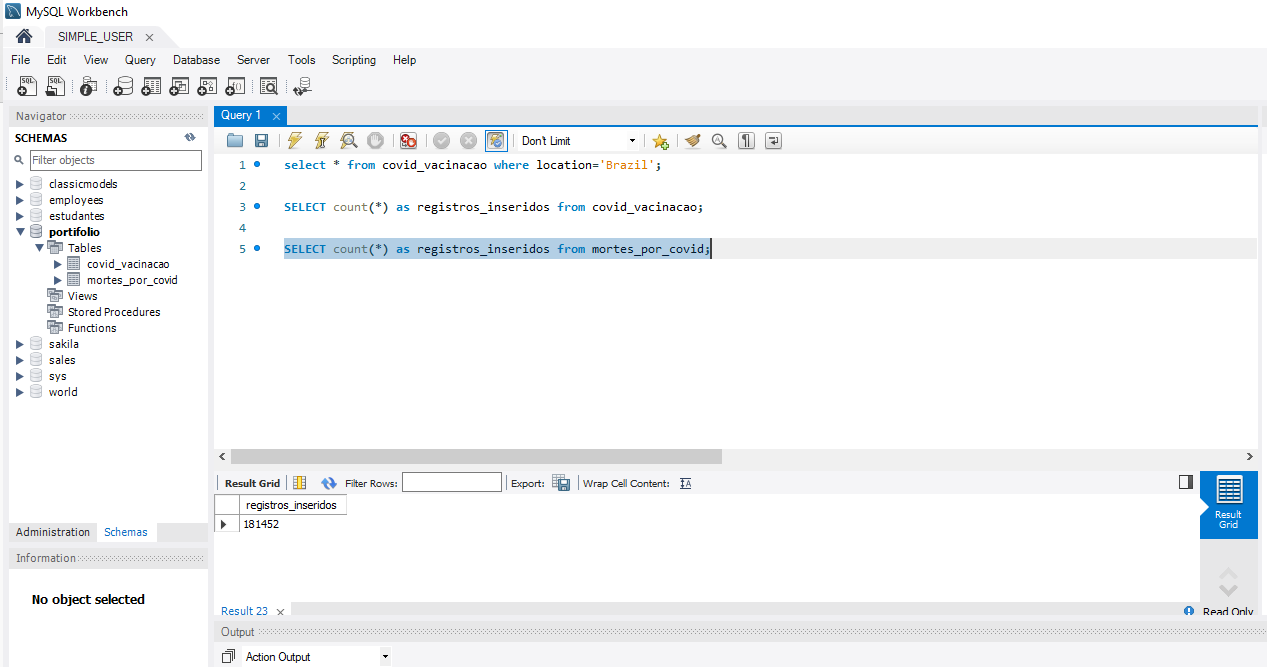

## ANALIZANDO DADOS DA TABELA covid_vacinacao e mortes_por_covid

In [22]:
sql = "select * from mortes_por_covid order by 3,4 limit 20;"
df2 = pd.read_sql_query(sql,conn)
df2.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-02-24,39835400.0,5.0,5.0,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
1,AFG,Asia,Afghanistan,2020-02-25,39835400.0,5.0,0.0,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
2,AFG,Asia,Afghanistan,2020-02-26,39835400.0,5.0,0.0,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
3,AFG,Asia,Afghanistan,2020-02-27,39835400.0,5.0,0.0,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
4,AFG,Asia,Afghanistan,2020-02-28,39835400.0,5.0,0.0,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None


In [23]:
sql = """select location, date, total_cases, new_cases, total_deaths, population
            from mortes_por_covid
            order by 1,2;"""
df2 = pd.read_sql_query(sql,conn)
df2.head()

,location,date,total_cases,new_cases,total_deaths,population
0,Afghanistan,2020-02-24,5.0,5.0,NaN,39835400.0
1,Afghanistan,2020-02-25,5.0,0.0,NaN,39835400.0
2,Afghanistan,2020-02-26,5.0,0.0,NaN,39835400.0
3,Afghanistan,2020-02-27,5.0,0.0,NaN,39835400.0
4,Afghanistan,2020-02-28,5.0,0.0,NaN,39835400.0


In [24]:
df2.head(20)

,location,date,total_cases,new_cases,total_deaths,population
0,Afghanistan,2020-02-24,5.0,5.0,NaN,39835400.0
1,Afghanistan,2020-02-25,5.0,0.0,NaN,39835400.0
2,Afghanistan,2020-02-26,5.0,0.0,NaN,39835400.0
3,Afghanistan,2020-02-27,5.0,0.0,NaN,39835400.0
4,Afghanistan,2020-02-28,5.0,0.0,NaN,39835400.0
5,Afghanistan,2020-02-29,5.0,0.0,NaN,39835400.0
6,Afghanistan,2020-03-01,5.0,0.0,NaN,39835400.0
7,Afghanistan,2020-03-02,5.0,0.0,NaN,39835400.0
8,Afghanistan,2020-03-03,5.0,0.0,NaN,39835400.0
9,Afghanistan,2020-03-04,5.0,0.0,NaN,39835400.0


# Total de cases vs Total de mortes

In [25]:
sql = """select location, date, total_cases, new_cases, total_deaths, (total_deaths/total_cases)*100
            from mortes_por_covid
            order by 1,2;"""
df2 = pd.read_sql_query(sql,conn)
df2.head(10)

,location,date,total_cases,new_cases,total_deaths,(total_deaths/total_cases)*100
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN
5,Afghanistan,2020-02-29,5.0,0.0,NaN,NaN
6,Afghanistan,2020-03-01,5.0,0.0,NaN,NaN
7,Afghanistan,2020-03-02,5.0,0.0,NaN,NaN
8,Afghanistan,2020-03-03,5.0,0.0,NaN,NaN
9,Afghanistan,2020-03-04,5.0,0.0,NaN,NaN


In [26]:
df2.tail(10)

,location,date,total_cases,new_cases,total_deaths,(total_deaths/total_cases)*100
181442,Zimbabwe,2022-04-15,247237.0,29.0,5462.0,2.209216
181443,Zimbabwe,2022-04-16,247237.0,0.0,5462.0,2.209216
181444,Zimbabwe,2022-04-17,247278.0,41.0,5463.0,2.209254
181445,Zimbabwe,2022-04-18,247297.0,19.0,5464.0,2.209489
181446,Zimbabwe,2022-04-19,247297.0,0.0,5464.0,2.209489
181447,Zimbabwe,2022-04-20,247336.0,39.0,5466.0,2.209949
181448,Zimbabwe,2022-04-21,247383.0,47.0,5467.0,2.209934
181449,Zimbabwe,2022-04-22,247488.0,105.0,5468.0,2.209400
181450,Zimbabwe,2022-04-23,247524.0,36.0,5468.0,2.209079
181451,Zimbabwe,2022-04-24,247524.0,0.0,5468.0,2.209079


In [27]:
sql = """select location, date, total_cases, new_cases, total_deaths, (total_deaths/total_cases)*100 as "Porcentagem de mortes"
            from mortes_por_covid
            where location like '%Bra%'
            order by 1,2;"""
df2 = pd.read_sql_query(sql,conn)
df2.head(10)

,location,date,total_cases,new_cases,total_deaths,Porcentagem de mortes
0,Brazil,2020-02-26,1.0,1.0,NaN,NaN
1,Brazil,2020-02-27,1.0,0.0,NaN,NaN
2,Brazil,2020-02-28,1.0,0.0,NaN,NaN
3,Brazil,2020-02-29,2.0,1.0,NaN,NaN
4,Brazil,2020-03-01,2.0,0.0,NaN,NaN
5,Brazil,2020-03-02,2.0,0.0,NaN,NaN
6,Brazil,2020-03-03,2.0,0.0,NaN,NaN
7,Brazil,2020-03-04,4.0,2.0,NaN,NaN
8,Brazil,2020-03-05,4.0,0.0,NaN,NaN
9,Brazil,2020-03-06,13.0,9.0,NaN,NaN


In [28]:
df2.tail(10)

,location,date,total_cases,new_cases,total_deaths,Porcentagem de mortes
1561,Gibraltar,2022-04-15,17494.0,0.0,101.0,0.577341
1562,Gibraltar,2022-04-16,17494.0,0.0,101.0,0.577341
1563,Gibraltar,2022-04-17,17494.0,0.0,101.0,0.577341
1564,Gibraltar,2022-04-18,17494.0,0.0,101.0,0.577341
1565,Gibraltar,2022-04-19,17494.0,0.0,101.0,0.577341
1566,Gibraltar,2022-04-20,17494.0,0.0,101.0,0.577341
1567,Gibraltar,2022-04-21,17706.0,212.0,101.0,0.570428
1568,Gibraltar,2022-04-22,17706.0,NaN,101.0,0.570428
1569,Gibraltar,2022-04-23,17706.0,NaN,102.0,0.576076
1570,Gibraltar,2022-04-24,17706.0,NaN,102.0,0.576076


In [29]:
sql = """select location, date, total_cases, new_cases, total_deaths, (total_deaths/total_cases)*100 as "Porcentagem de mortes"
            from mortes_por_covid
            where location='Brazil'
            order by 1,2;"""
df2 = pd.read_sql_query(sql,conn)
df2.head(20)

,location,date,total_cases,new_cases,total_deaths,Porcentagem de mortes
0,Brazil,2020-02-26,1.0,1.0,NaN,NaN
1,Brazil,2020-02-27,1.0,0.0,NaN,NaN
2,Brazil,2020-02-28,1.0,0.0,NaN,NaN
3,Brazil,2020-02-29,2.0,1.0,NaN,NaN
4,Brazil,2020-03-01,2.0,0.0,NaN,NaN
5,Brazil,2020-03-02,2.0,0.0,NaN,NaN
6,Brazil,2020-03-03,2.0,0.0,NaN,NaN
7,Brazil,2020-03-04,4.0,2.0,NaN,NaN
8,Brazil,2020-03-05,4.0,0.0,NaN,NaN
9,Brazil,2020-03-06,13.0,9.0,NaN,NaN


In [30]:
df2.tail(20)

,location,date,total_cases,new_cases,total_deaths,Porcentagem de mortes
769,Brazil,2022-04-05,30042300.0,26915.0,660786.0,2.199521
770,Brazil,2022-04-06,30069100.0,26822.0,660980.0,2.198204
771,Brazil,2022-04-07,30095300.0,26234.0,661228.0,2.197112
772,Brazil,2022-04-08,30125500.0,30212.0,661377.0,2.195403
773,Brazil,2022-04-09,30146800.0,21229.0,661475.0,2.194182
774,Brazil,2022-04-10,30154000.0,7210.0,661513.0,2.193783
775,Brazil,2022-04-11,30161900.0,7930.0,661576.0,2.193416
776,Brazil,2022-04-12,30184300.0,22377.0,661741.0,2.192336
777,Brazil,2022-04-13,30210900.0,26648.0,661904.0,2.190942
778,Brazil,2022-04-14,30234000.0,23090.0,662043.0,2.189728


# Total de cases vs populaçao

In [31]:
sql = """select location, date, total_cases, population, (total_cases/population)*100 as "Porcentagem de casos"
            from mortes_por_covid
            where location='Brazil'
            order by 1,2;"""
df2 = pd.read_sql_query(sql,conn)
df2.head(20)

,location,date,total_cases,population,Porcentagem de casos
0,Brazil,2020-02-26,1.0,213993000.0,4.673040e-07
1,Brazil,2020-02-27,1.0,213993000.0,4.673040e-07
2,Brazil,2020-02-28,1.0,213993000.0,4.673040e-07
3,Brazil,2020-02-29,2.0,213993000.0,9.346081e-07
4,Brazil,2020-03-01,2.0,213993000.0,9.346081e-07
5,Brazil,2020-03-02,2.0,213993000.0,9.346081e-07
6,Brazil,2020-03-03,2.0,213993000.0,9.346081e-07
7,Brazil,2020-03-04,4.0,213993000.0,1.869216e-06
8,Brazil,2020-03-05,4.0,213993000.0,1.869216e-06
9,Brazil,2020-03-06,13.0,213993000.0,6.074953e-06


In [32]:
df2.tail(20)

,location,date,total_cases,population,Porcentagem de casos
769,Brazil,2022-04-05,30042300.0,213993000.0,14.038875
770,Brazil,2022-04-06,30069100.0,213993000.0,14.051409
771,Brazil,2022-04-07,30095300.0,213993000.0,14.063668
772,Brazil,2022-04-08,30125500.0,213993000.0,14.077787
773,Brazil,2022-04-09,30146800.0,213993000.0,14.087707
774,Brazil,2022-04-10,30154000.0,213993000.0,14.091077
775,Brazil,2022-04-11,30161900.0,213993000.0,14.094782
776,Brazil,2022-04-12,30184300.0,213993000.0,14.105239
777,Brazil,2022-04-13,30210900.0,213993000.0,14.117692
778,Brazil,2022-04-14,30234000.0,213993000.0,14.128482


# paises com a maior taxa de infecção comparado com a população

In [33]:
sql = """select location, population, max(total_cases) as "Maior taxa de infecção", max((total_cases/population))*100 
            as "Porcentagem da população infectada"
            from mortes_por_covid
            group by location, population
            order by 1,2;"""
df2 = pd.read_sql_query(sql,conn)
df2.head(30)

,location,population,Maior taxa de infecção,Porcentagem da população infectada
0,Afghanistan,3.983540e+07,178689.0,0.448568
1,Africa,1.373490e+09,11639600.0,0.847449
2,Albania,2.872930e+06,274828.0,9.566109
3,Algeria,4.461660e+07,265767.0,0.595668
4,Andorra,7.735400e+04,41013.0,53.019883
5,Angola,3.393360e+07,99287.0,0.292592
6,Anguilla,1.512500e+04,2731.0,18.056198
7,Antigua and Barbuda,9.872800e+04,7571.0,7.668544
8,Argentina,4.560580e+07,9060920.0,19.867908
9,Armenia,2.968130e+06,422825.0,14.245511


In [34]:
df2.tail(30)

,location,population,Maior taxa de infecção,Porcentagem da população infectada
212,Tanzania,6.149840e+07,33864.0,0.055065
213,Thailand,6.995080e+07,4180870.0,5.976865
214,Timor,1.343880e+06,22860.0,1.701051
215,Togo,8.478240e+06,36977.0,0.436140
216,Tokelau,1.368000e+03,NaN,NaN
217,Tonga,1.067590e+05,9553.0,8.948192
218,Trinidad and Tobago,1.403370e+06,144563.0,10.301103
219,Tunisia,1.193580e+07,1039530.0,8.709388
220,Turkey,8.504270e+07,15018500.0,17.660000
221,Turkmenistan,6.117930e+06,NaN,NaN


In [35]:
df2.loc[30:60,:]

,location,population,Maior taxa de infecção,Porcentagem da população infectada
30,British Virgin Islands,3.042300e+04,6296.0,20.694869
31,Brunei,4.415320e+05,141119.0,31.961217
32,Bulgaria,6.896660e+06,1153130.0,16.720120
33,Burkina Faso,2.149710e+07,20865.0,0.097060
34,Burundi,1.225540e+07,38887.0,0.317304
35,Cambodia,1.694640e+07,136216.0,0.803803
36,Cameroon,2.722430e+07,119780.0,0.439975
37,Canada,3.806790e+07,3706400.0,9.736281
38,Cape Verde,5.619010e+05,56004.0,9.966880
39,Cayman Islands,6.649800e+04,21755.0,32.715270


In [36]:
sql = """select location, population, max(total_cases) as "Maior taxa de infecção", max((total_cases/population))*100 
            as "Porcentagem da população infectada"
            from mortes_por_covid
            group by location, population
            order by 4;"""
pd.read_sql_query(sql,conn).head(20)

,location,population,Maior taxa de infecção,Porcentagem da população infectada
0,Guam,170184.0,NaN,NaN
1,Guernsey,63385.0,NaN,NaN
2,International,NaN,721.0,NaN
3,Jersey,101073.0,NaN,NaN
4,Nauru,10873.0,NaN,NaN
5,Niue,1614.0,NaN,NaN
6,Northern Cyprus,NaN,NaN,NaN
7,Northern Mariana Islands,57910.0,NaN,NaN
8,Pitcairn,47.0,NaN,NaN
9,Puerto Rico,2828250.0,NaN,NaN


In [37]:
sql = """select location, population, max(total_cases) as "Maior taxa de infecção", max((total_cases/population))*100 
            as "Porcentagem da população infectada"
            from mortes_por_covid
            group by location, population
            order by 4 desc;"""
pd.read_sql_query(sql,conn)

,location,population,Maior taxa de infecção,Porcentagem da população infectada
0,Faeroe Islands,49053.0,34658.0,70.654190
1,Denmark,5813300.0,3110020.0,53.498322
2,Andorra,77354.0,41013.0,53.019883
3,Gibraltar,33691.0,17706.0,52.554095
4,Cyprus,896005.0,470481.0,52.508747
...,...,...,...,...
237,Sint Maarten (Dutch part),43421.0,NaN,NaN
238,Tokelau,1368.0,NaN,NaN
239,Turkmenistan,6117930.0,NaN,NaN
240,Tuvalu,11925.0,NaN,NaN


# Paises com a maior contagem de mortes em relação a população

In [38]:
sql = """select location, max(total_deaths) as "Contagem total de mortes"
            from mortes_por_covid
            where continent is not null
            group by location
            order by 2 desc;"""
pd.read_sql_query(sql,conn)

,location,Contagem total de mortes
0,United States,991254.0
1,Brazil,662891.0
2,India,522223.0
3,Russia,367366.0
4,Mexico,324129.0
...,...,...
224,Tokelau,NaN
225,Turkmenistan,NaN
226,Tuvalu,NaN
227,United States Virgin Islands,NaN


# Agregar por continente

In [39]:
sql = """select continent, max(total_deaths) as "Contagem total de mortes"
            from mortes_por_covid
            where continent is not null
            group by continent
            order by 2 desc;"""
pd.read_sql_query(sql,conn)

,continent,Contagem total de mortes
0,North America,991254.0
1,South America,662891.0
2,Asia,522223.0
3,Europe,367366.0
4,Africa,100303.0
5,Oceania,7006.0


In [40]:
sql = """select location, max(total_deaths) as "Contagem total de mortes"
            from mortes_por_covid
            where continent is null
            group by location
            order by 2 desc;"""
pd.read_sql_query(sql,conn)

,location,Contagem total de mortes
0,World,6218020.0
1,Upper middle income,2506290.0
2,High income,2362620.0
3,Europe,1809880.0
4,North America,1427660.0
5,Asia,1424480.0
6,Lower middle income,1305960.0
7,South America,1292870.0
8,European Union,1070490.0
9,Africa,252790.0


In [41]:
sql = """select location, max(total_deaths) as "Contagem total de mortes"
            from mortes_por_covid
            where continent is null
            group by location
            order by 2 desc;"""
pd.read_sql_query(sql,conn)

,location,Contagem total de mortes
0,World,6218020.0
1,Upper middle income,2506290.0
2,High income,2362620.0
3,Europe,1809880.0
4,North America,1427660.0
5,Asia,1424480.0
6,Lower middle income,1305960.0
7,South America,1292870.0
8,European Union,1070490.0
9,Africa,252790.0


In [42]:
sql = """select location, max(total_deaths) as "Contagem total de mortes"
            from mortes_por_covid
            where continent is null
            and location not in ('World', 'Upper middle income', 'High income', 'Lower middle income', 'Low income', 'International')
            group by location
            order by 2 desc;"""
pd.read_sql_query(sql,conn)

,location,Contagem total de mortes
0,Europe,1809880.0
1,North America,1427660.0
2,Asia,1424480.0
3,South America,1292870.0
4,European Union,1070490.0
5,Africa,252790.0
6,Oceania,10322.0


In [43]:
sql = """select location, max(total_deaths) as "Contagem total de mortes"
            from mortes_por_covid
            where continent is null
            and location in ('World', 'Upper middle income', 'High income', 'Lower middle income', 'Low income', 'International')
            group by location
            order by 2 desc;"""
pd.read_sql_query(sql,conn)

,location,Contagem total de mortes
0,World,6218020.0
1,Upper middle income,2506290.0
2,High income,2362620.0
3,Lower middle income,1305960.0
4,Low income,43077.0
5,International,15.0


### CONTAGEM DE MORTES POR COVID-19 NO PERIODO DE 05/04/2022 ATÉ 24/04/2022, NO MUNDO TODO.

In [47]:
sql = """select date, sum(new_cases) as 'novos casos', 
            sum(new_deaths) as 'mortes/dia', 
            (sum(new_deaths)/sum(new_cases))*100 as 'Porcentagem de mortes'
            from mortes_por_covid
            where continent is not null
            group by date
            order by 1,2;"""
pd.read_sql_query(sql,conn).tail(20)

,date,novos casos,mortes/dia,Porcentagem de mortes
825,2022-04-05,1358778.0,4251.0,0.312855
826,2022-04-06,1454012.0,4530.0,0.311552
827,2022-04-07,1216003.0,4125.0,0.339226
828,2022-04-08,1193246.0,4108.0,0.344271
829,2022-04-09,768033.0,2158.0,0.280978
830,2022-04-10,567888.0,1472.0,0.259206
831,2022-04-11,972999.0,2948.0,0.302981
832,2022-04-12,1079471.0,3303.0,0.305983
833,2022-04-13,1039844.0,4553.0,0.437854
834,2022-04-14,969243.0,3708.0,0.382567


In [50]:
# TOTAL DE MORTES POR COVID_19 DESTE 01/01/2020 ATÉ 24/04/2022
sql = """select sum(new_cases) as 'total_infectados', 
            sum(new_deaths) as 'total mortes', 
            (sum(new_deaths)/sum(new_cases))*100 as 'Porcentagem de mortes'
            from mortes_por_covid
            where continent is not null
            order by 1,2;"""
pd.read_sql_query(sql,conn)

,total_infectados,total mortes,Porcentagem de mortes
0,508394509.0,6177417.0,1.215083


In [52]:
# PERCENTUAL MUNDIAL DE MORTES POR COVID EM 2020
sql = """select sum(new_cases) as 'total_infectados', 
            sum(new_deaths) as 'total mortes', 
            (sum(new_deaths)/sum(new_cases))*100 as 'Porcentagem de mortes'
            from mortes_por_covid
            where date > '2020/01/01' and date < '2021/01/01'
            and continent is not null
            order by 1,2;"""
covid_2020_df = pd.read_sql_query(sql,conn)
covid_2020_df

,total_infectados,total mortes,Porcentagem de mortes
0,83047253.0,1873512.0,2.255959


In [53]:
# PERCENTUAL MUNDIAL DE MORTES POR COVID EM 2021
sql = """select sum(new_cases) as 'total_infectados', 
            sum(new_deaths) as 'total mortes', 
            (sum(new_deaths)/sum(new_cases))*100 as 'Porcentagem de mortes'
            from mortes_por_covid
            where date > '2021/01/01' and date < '2022/01/01'
            and continent is not null
            order by 1,2;"""
covid_2021_df = pd.read_sql_query(sql,conn)
covid_2021_df

,total_infectados,total mortes,Porcentagem de mortes
0,204717858.0,3527687.0,1.723195


In [54]:
# PERCENTUAL DE MUNDIAL DE MORTES POR COVID DE 01/01/2022 ATÉ 24/04/2022
sql = """select sum(new_cases) as 'total casos', 
            sum(new_deaths) as 'total mortes', 
            (sum(new_deaths)/sum(new_cases))*100 as 'Porcentagem de mortes'
            from mortes_por_covid
            where date between '2022/01/01' and '2022/12/31'
            and continent is not null
            order by 1,2;"""
covid_2022_df = pd.read_sql_query(sql,conn)
covid_2022_df

,total casos,total mortes,Porcentagem de mortes
0,220041346.0,766263.0,0.348236


In [55]:
conn.close()